In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

### Exercici 1
#### Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 



In [3]:
df= pd.read_csv ("/Users/esthersanroma/Desktop/DATA SCIENCES/Lligues europees UEFA.csv",sep=";",encoding="iso-8859-1",
engine="python")
df.head(10)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
5,6,Milan,ITA,1,37,25,8,4,66,31,...,83,2.24,60.0,34.4,25.6,0.69,W W W W W,42388,Rafael Leão - 11,Mike Maignan
6,7,Inter,ITA,2,37,24,9,4,81,32,...,81,2.19,78.1,38.2,39.9,1.08,W L W W W,41995,Lautaro Martínez - 21,Samir Handanovi?
7,8,Napoli,ITA,3,37,23,7,7,71,31,...,76,2.05,58.5,29.9,28.6,0.77,D L W W W,26681,Victor Osimhen - 14,David Ospina
8,9,Dortmund,GER,2,34,22,3,9,85,52,...,69,2.03,62.8,43.2,19.6,0.58,W L L W W,41800,Erling Haaland - 22,Gregor Kobel
9,10,Barcelona,ESP,2,37,21,10,6,68,36,...,73,1.97,61.3,35.2,26.1,0.71,L W W W D,53933,Memphis Depay - 12,Marc-André ter Stegen


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [5]:
df.columns

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

Rk: Ranking, possició en la que ha quedat l'equip, relacionat a la columna Pts.

Squad: Nom de l'equip.

Country: País de l'equip.

LgRk: League Ranking, possició de l'equip a la lliga del seu país.

MP: Matches Played, partis jugats.

W: Wins, partits guanyats.

D: Draws, partis empatats.

L: Losses, partits perduts.

GF: Goals For, gols a favor.

GA: Goals Against, gols en contra.

GD: Goal Difference, és la resta de gols en contra i gols a favor.

Pts: Points. Els punts totals dels partits guanyats (3 punts) i els empatats (1 punt).

Pts/G: Points/Game, mitjana de punts per cada partit.

xG: Expected Goal, probabilitat de gol.

xGA: Expected Goal Against, probabilitat de gol en contra.

xGD: Expected Goal Difference, diferència de probabilitat, és la resta de probabilitat de gol i probabilitat de gol en contra.

xGD/90: La diferència de probabilitat cada 90 minuts (la duració d'un partit).

Last 5: Resultat dels últims 5 partits (W, D o L).


Attendance: Quantitat d'espectadors que han anat al camp.

Top Team Scorer: Jugador que més gols ha marcat.

Goalkeeper: Porter.

In [6]:
df.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

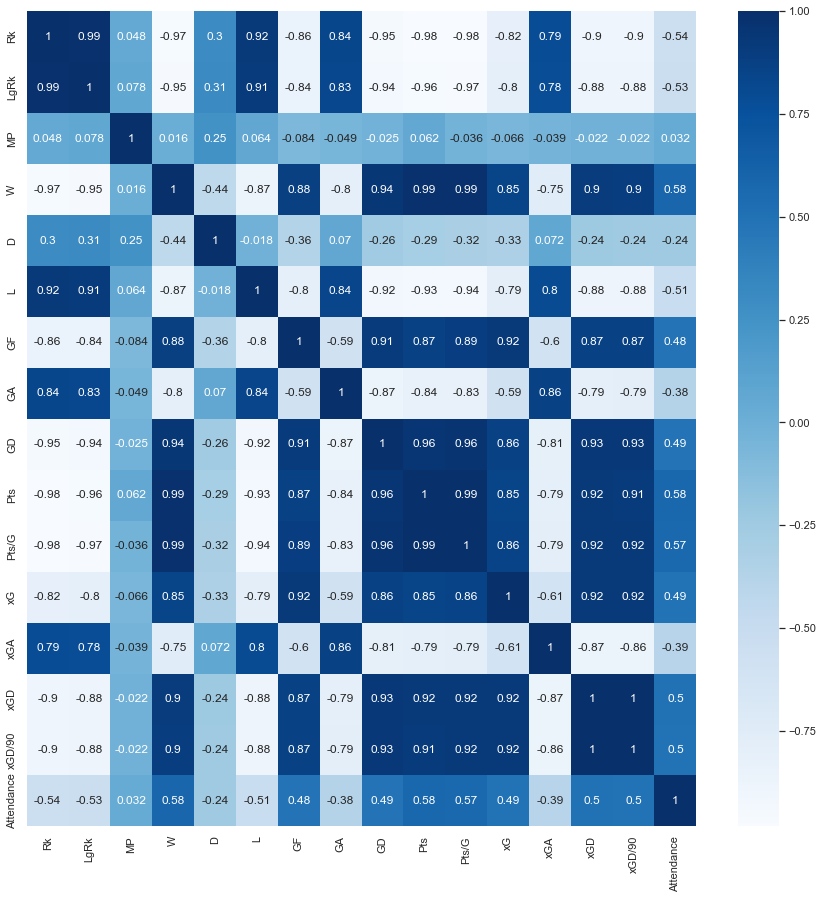

In [53]:
sns.heatmap(df.corr(), cmap = "Blues", annot = True)
sns.set(rc = {'figure.figsize':(12,12)})

Histograma + curva normal teórica.

Valors de la mitja (mu) y desviació típica (sigma)

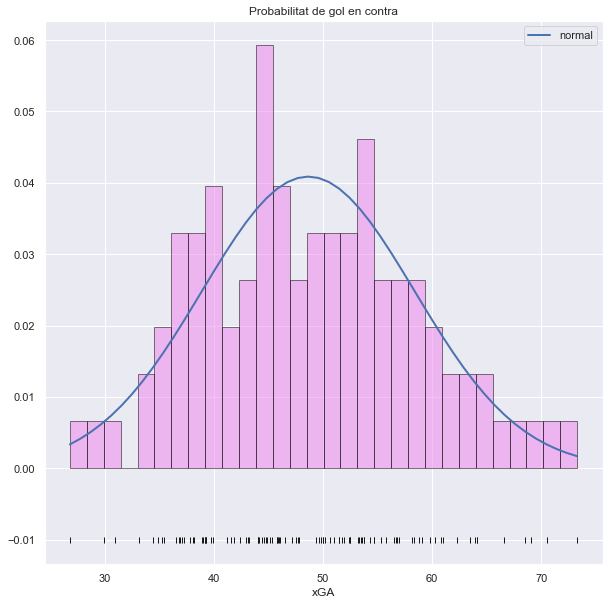

In [51]:
import statsmodels.api as sm
from scipy import stats
mu, sigma = stats.norm.fit(df["xGA"])

x_hat = np.linspace(min(df["xGA"]), max(df["xGA"]))
y_hat = stats.norm.pdf(x_hat, mu, sigma)


fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=df["xGA"], density=True, bins=30, color="violet",edgecolor="black", alpha=0.5)
ax.plot(df["xGA"], np.full_like(df["xGA"], -0.01), '|k', markeredgewidth=1)
ax.set_title('Probabilitat de gol en contra')
ax.set_xlabel('xGA')
ax.legend();

#### Shapiro-Wilk

H0: la mostra té una distribució gaussiana.
H1: la mostra no té una distribució gaussiana.
xGA:probabilitat de gol en contra.

In [16]:
from scipy.stats import shapiro
stat, p = shapiro(df["xGA"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablement Gaussià')
else:
	print('Probablement No Gaussià')

stat=0.989, p=0.610
Probablement Gaussià


#### D’Agostino’s K^2 Test

In [17]:
from scipy.stats import normaltest
stat, p = normaltest(df["xGA"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablement Gaussià')
else:
 print('Probablement no Gaussià')

stat=1.721, p=0.423
Probablement Gaussià


### Exercici 2
#### Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

#### Correlation Tests

H0: les dues mostres són independents.
H1: hi ha una dependència entre les mostres.
Pts:Els punts totals dels partits guanyats (3 punts) i els empatats (1 punt)
GD: Es la resta de gols en contra i gols a favor.

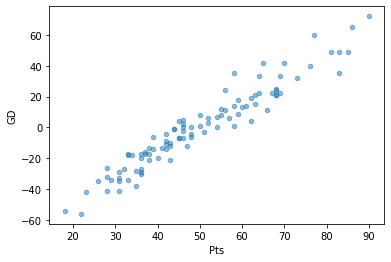

In [25]:
df.plot.scatter(x="Pts", y="GD", alpha=0.5)
plt.show()

In [22]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["Pts"], df["GD"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablement independent')
else:
	print("Probablement dependent")

stat=0.960, p=0.000
Probablement dependent


### Exercici 3
#### Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

#### Analysis of Variance Test (ANOVA)

H0: les mitjanes de les mostres són iguals.
H1: una o més de les mitjanes de les mostres són desiguals.
W: Wins, partits guanyats.
GF: Goals For, gols a favor.
xG: Expected Goal, probabilitat de gol.

In [33]:
from scipy.stats import f_oneway
stat, p = f_oneway(df["W"], df["GF"], df["xG"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probablement les mitjanes de les mostres són iguals")
else:
	print("Probablement les mitjanes de les mostres no són iguals")

stat=289.679, p=0.000
Probablement les mitjanes de les mostres no són iguals


GF: Goals For, gols a favor.
GA: Goals Against, gols en contra.
Pts: Points. Els punts totals dels partits guanyats (3 punts) i els empatats (1 punt).

In [35]:
stat, p = f_oneway(df["GA"], df["GF"], df["Pts"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probablement les mitjanes de les mostres són iguals")
else:
	print("Probablement les mitjanes de les mostres no són iguals")

stat=0.181, p=0.834
Probablement les mitjanes de les mostres són iguals


El valor p-value és un valor de probabilitat, per tant oscil·la entre 0 i 1. El valor p-value ens mostra la probabilitat d'haver obtingut el resultat que hem obtingut suposant que la hipòtesi nul·la H0 és certa.
